In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import math
from google.colab import files

In [ ]:
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
Houses = pd.read_csv(file_name)

Saving USA_Housing.csv to USA_Housing.csv


In [ ]:
Houses.head()
Houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [ ]:
Houses.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [ ]:
X = Houses[['Avg. Area Income', 'Avg. Area House Age',
            'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms',
            'Area Population']]
y = Houses['Price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

print(f"Original features: {X_train.shape[1]}, Polynomial features: {X_train_poly.shape[1]}")

Original features: 5, Polynomial features: 20


In [ ]:
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test_poly)
mse = mean_squared_error(y_test, y_pred)
mse_final = math.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse_final:.2f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error (MSE): 100409.08
R² Score: 0.9146


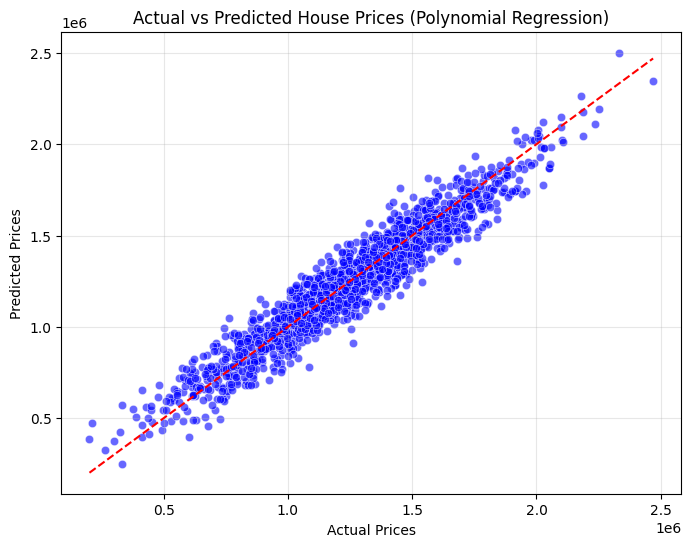

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, color="blue", alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title("Actual vs Predicted House Prices (Polynomial Regression)")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.grid(True, alpha=0.3)
plt.show()

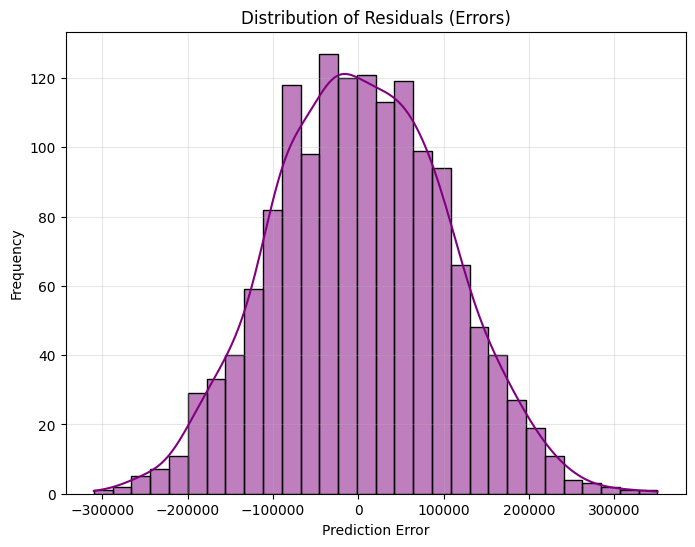

In [ ]:
residuals = y_test - y_pred
plt.figure(figsize=(8,6))
sns.histplot(residuals, bins=30, kde=True, color='purple')
plt.title("Distribution of Residuals (Errors)")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.grid(True, alpha=0.3)
plt.show()

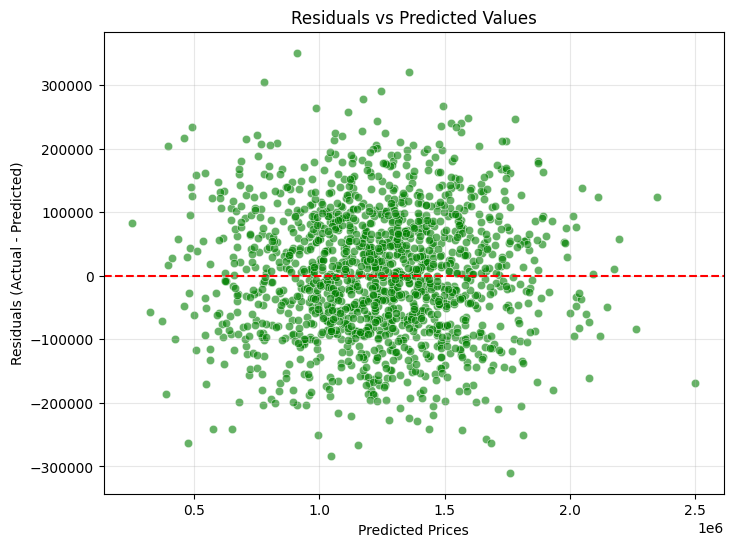

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred, y=residuals, color='green', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals (Actual - Predicted)")
plt.grid(True, alpha=0.3)
plt.show()

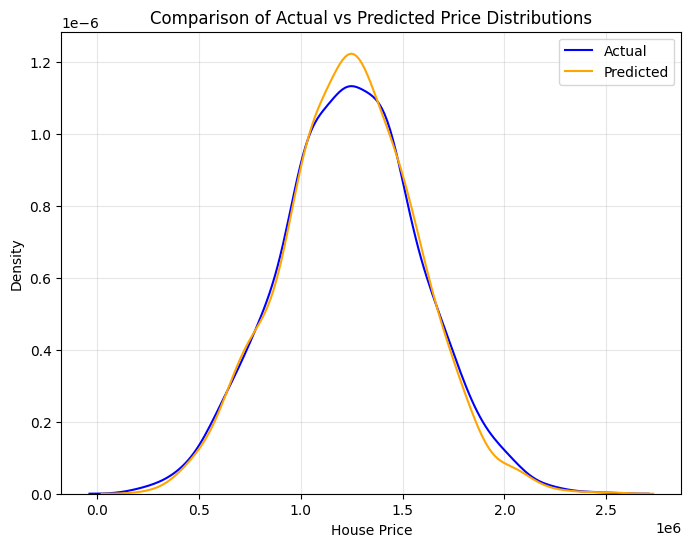

In [ ]:
plt.figure(figsize=(8,6))
sns.kdeplot(y_test, label='Actual', color='blue')
sns.kdeplot(y_pred, label='Predicted', color='orange')
plt.title("Comparison of Actual vs Predicted Price Distributions")
plt.xlabel("House Price")
plt.ylabel("Density")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()